In [1]:
import pandas as pd
import numpy as np
import os
import random

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#I picked 6 because I like 6. This is so we get the same results every time
np.random.seed(6)

In [3]:
#idk make your working directory whatever works for you
os.chdir('C:/Users/Luis/Documents/GitHub/anaan_ml/')

In [4]:
#reading in our data
dat = pd.read_csv('cleaning and combining datasets/ANAANcombined_cec_2023-07-19.csv')
dat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,...,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,female,cis woman,heterosexual,27,68.0,99.0,15.051254,AN,...,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,female,cis woman,heterosexual,36,66.0,135.0,21.787190,AAN,...,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,female,cis woman,heterosexual,27,66.0,105.0,16.945592,AN,...,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,female,cis woman,heterosexual,30,60.0,106.0,20.699444,AAN,...,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,female,cis woman,heterosexual,26,63.0,105.0,18.597884,AN,...,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,female,cis woman,heterosexual,39,66.0,125.0,20.173324,AAN,...,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,CS,CS101,female,cis woman,heterosexual,57,64.0,96.0,16.476562,AN,...,4.0,12.0,9.0,11.0,14.0,3.20625,3.8,3.0,3.625,2.4
445,CS,CS103,female,cis woman,bisexual,23,63.0,103.0,18.243638,AN,...,2.0,6.0,9.0,0.0,4.0,1.68750,2.0,2.0,1.750,1.0
446,CS,CS105,female,cis woman,bisexual,31,64.0,112.0,19.222656,AN,...,10.0,23.0,18.0,10.0,9.0,1.25625,0.4,2.2,1.625,0.8


In [5]:
#i want to see every column
pd.set_option("display.max.columns", None)

In [6]:
#easier to look at column names this way
for col in dat.columns: 
    print(col)

study
participant_id
sex
gender
sexual_orient
age
height
weight
bmi
dx
CurrentDX2
comorbidities
education_level
school_year
employment
religion
religion_desc
ethnicity
API
ethnicity_desc
meds
income
marital_status
smoking_status
ede_q_1
ede_q_2
ede_q_3
ede_q_4
ede_q_5
ede_q_6
ede_q_7
ede_q_8
ede_q_9
ede_q_10
ede_q_11
ede_q_12
ede_q_13
ede_q_14
ede_q_15
ede_q_16
ede_q_17
ede_q_18
ede_q_19
ede_q_20
ede_q_21
ede_q_22
ede_q_23
ede_q_24
ede_q_25
ede_q_26
ede_q_27
ede_q_28
ede_q_29
ede_q_30
ede_q_31
ede_q_32
ede_q_33
ede_q_34
ede_q_35
ede_q_36
ede_q_37
ede_q_38
ede_q_39
ede_q_40
ede_q_41
ede_q_42
edeq4_restraint
edeq4_ec
edeq4_sc
edeq4_wc
edeq4_global
edeq6_1
edeq6_2
edeq6_3
edeq6_4
edeq6_5
edeq6_6
edeq6_7
edeq6_8
edeq6_9
edeq6_10
edeq6_11
edeq6_12
edeq6_13
edeq6_14
edeq6_15
edeq6_16
edeq6_17
edeq6_18
edeq6_19
edeq6_20
edeq6_21
edeq6_22
edeq6_23
edeq6_24
edeq6_25
edeq6_26
edeq6_27
edeq6_28
edeq6_29
edeq6_30
edeq6_31
edeq6_32
edeq6_33
edeq6_missedperiod
edeq6_nummissperiod
edeq6_pill
edeq6_re

In [7]:
#removing individual variables and only keeping subscales and totals
cleandat = dat.drop(columns = {'bdi_1', 'bdi_2', 'bdi_3', 'bdi_4', 'bdi_5', 'bdi_6', 'bdi_7', 'bdi_8', 'bdi_9', 'bdi_10', 'bdi_11', 'bdi_12', 'bdi_13', 'bdi_14', 'bdi_15', 'bdi_16', 'bdi_17', 'bdi_18', 'bdi_19', 'bdi_20', 'bdi_21', 
                               'ede_q_1', 'ede_q_2', 'ede_q_3', 'ede_q_4', 'ede_q_5', 'ede_q_6', 'ede_q_7', 'ede_q_8', 'ede_q_9', 'ede_q_10', 'ede_q_11', 'ede_q_12', 'ede_q_13', 'ede_q_14', 'ede_q_15', 'ede_q_16', 'ede_q_17', 'ede_q_18', 'ede_q_19', 'ede_q_20', 'ede_q_21', 'ede_q_22', 'ede_q_23', 'ede_q_24', 'ede_q_25', 'ede_q_26', 'ede_q_27', 'ede_q_28', 'ede_q_29', 'ede_q_30', 'ede_q_31', 'ede_q_32', 'ede_q_33', 'ede_q_34', 'ede_q_35', 'ede_q_36', 'ede_q_37', 'ede_q_38', 'ede_q_39', 'ede_q_40', 'ede_q_41', 'ede_q_42',
                               'fof_1', 'fof_2', 'fof_3', 'fof_4', 'fof_5', 'fof_6', 'fof_7', 'fof_8', 'fof_9', 'fof_10', 'fof_11', 'fof_12', 'fof_13', 'fof_14', 'fof_15', 'fof_16', 'fof_17', 'fof_18', 'fof_19', 'fof_20', 'fof_21', 'fof_22', 'fof_23', 'fof_24', 'fof_25',
                               'oci_1', 'oci_2', 'oci_3', 'oci_4', 'oci_5', 'oci_6', 'oci_7', 'oci_8', 'oci_9', 'oci_10', 'oci_11', 'oci_12', 'oci_13', 'oci_14', 'oci_15', 'oci_16', 'oci_17', 'oci_18', 
                               'saas_1', 'saas_1r', 'saas_2', 'saas_3', 'saas_4', 'saas_5', 'saas_6', 'saas_7', 'saas_8', 'saas_9', 'saas_10', 'saas_11', 'saas_12', 'saas_13', 'saas_14', 'saas_15', 'saas_16', 
                               'fmps_1', 'fmps_2', 'fmps_3', 'fmps_4', 'fmps_5', 'fmps_6', 'fmps_7', 'fmps_8', 'fmps_9', 'fmps_10', 'fmps_11', 'fmps_12', 'fmps_13', 'fmps_14', 'fmps_15', 'fmps_16', 'fmps_17', 'fmps_18', 'fmps_19', 'fmps_20', 'fmps_21', 'fmps_22', 'fmps_23', 'fmps_24', 'fmps_25', 'fmps_26', 'fmps_27', 'fmps_28', 'fmps_29', 'fmps_30', 'fmps_31', 'fmps_32', 'fmps_33', 'fmps_34', 'fmps_35',
                               'pswq_1', 'pswq_2', 'pswq_3', 'pswq_4', 'pswq_5', 'pswq_6', 'pswq_7', 'pswq_8', 'pswq_9', 'pswq_10', 'pswq_11', 'pswq_12', 'pswq_13', 'pswq_14', 'pswq_15', 'pswq_16', 'pswq1r', 'pswq3r', 'pswq8r', 'pswq10r', 'pswq11r', 
                               'efq_1', 'efq_2', 'efq_3', 'efq_4', 'efq_5', 'efq_6', 'efq_7', 'efq_8', 'efq_9', 'efq_10', 'efq_11', 'efq_12', 'efq_13', 'efq_14', 'efq_15', 'efq_16', 'efq_17', 'efq_18', 'efq_19', 'efq_20', 
                               'edeq6_1', 'edeq6_2', 'edeq6_3', 'edeq6_4', 'edeq6_5', 'edeq6_6', 'edeq6_7', 'edeq6_8', 'edeq6_9', 'edeq6_10', 'edeq6_11', 'edeq6_12', 'edeq6_13', 'edeq6_14', 'edeq6_15', 'edeq6_16', 'edeq6_17', 'edeq6_18', 'edeq6_19', 'edeq6_20', 'edeq6_21', 'edeq6_22', 'edeq6_23', 'edeq6_24', 'edeq6_25', 'edeq6_26', 'edeq6_27', 'edeq6_28', 'edeq6_29', 'edeq6_30', 'edeq6_31', 'edeq6_32', 'edeq6_33', 
                               'epsi_1', 'epsi_2', 'epsi_3', 'epsi_4', 'epsi_5', 'epsi_6', 'epsi_7', 'epsi_8', 'epsi_9', 'epsi_10', 'epsi_11', 'epsi_12', 'epsi_13', 'epsi_14', 'epsi_15', 'epsi_16', 'epsi_17', 'epsi_18', 'epsi_19', 'epsi_20', 'epsi_21', 'epsi_22', 'epsi_23', 'epsi_24', 'epsi_25', 'epsi_26', 'epsi_27', 'epsi_28', 'epsi_29', 'epsi_30', 'epsi_31', 'epsi_32', 'epsi_33', 'epsi_34', 'epsi_35', 'epsi_36', 'epsi_37', 'epsi_38', 'epsi_39', 'epsi_40', 'epsi_41', 'epsi_42', 'epsi_43', 'epsi_44', 'epsi_45', 
                               'pclc_1', 'pclc_2', 'pclc_3', 'pclc_4', 'pclc_5', 'pclc_6', 'pclc_7', 'pclc_8', 'pclc_9', 'pclc_10', 'pclc_11', 'pclc_12', 'pclc_13', 'pclc_14', 'pclc_15', 'pclc_16', 'pclc_17'})
cleandat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,edeq4_restraint,edeq4_ec,edeq4_sc,edeq4_wc,edeq4_global,edeq6_missedperiod,edeq6_nummissperiod,edeq6_pill,edeq6_restraint,edeq6_ec,edeq6_sc,edeq6_wc,edeq6_global,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,female,cis woman,heterosexual,27,68.0,99.0,15.051254,AN,ANR,NaN,Master's degree,18.0,not working,Agnostic,"Raised Catholic, currently agnostic.","White, not of Hispanic origin (includes Caucas...",NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,3.6,2.4,3.000,3.0,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,female,cis woman,heterosexual,36,66.0,135.0,21.787190,AAN,AANBP,NaN,NaN,16.0,working part-time,Atheist,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,1.8,2.0,3.125,3.4,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,female,cis woman,heterosexual,27,66.0,105.0,16.945592,AN,ANR,NaN,NaN,18.0,working part-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Presbyterian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.4,1.500,2.6,1.27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,female,cis woman,heterosexual,30,60.0,106.0,20.699444,AAN,AANR,NaN,NaN,18.0,working full-time,Judaism,Conservative Judaism,"White, not of Hispanic origin (includes Caucas...",NaN,"American, originally Eastern European",NaN,NaN,NaN,NaN,2.8,2.4,4.875,4.6,3.66875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,female,cis woman,heterosexual,26,63.0,105.0,18.597884,AN,ANBP,NaN,High school graduate,14.0,working full-time,Roman Catholicism,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.4,4.125,3.8,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,female,cis woman,heterosexual,39,66.0,125.0,20.173324,AAN,AANR,NaN,NaN,19.0,working full-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Progressive Christian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,"married, or remarried",no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,3.2,5.250,5.4,4.51250,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,

In [8]:
print(cleandat['sex'].unique())
print(cleandat['gender'].unique())
print(cleandat['sexual_orient'].unique())
print(cleandat['dx'].unique())
print(cleandat['education_level'].unique())
print(cleandat['employment'].unique())

['female' 'male' 'intersex']
['cis woman' 'cis man' 'nonbinary' 'Not listed' nan 'trans man']
['heterosexual' 'Not listed' 'gay or lesbian' 'bisexual' 'questioning' nan
 'Prefer not to disclose' 'lesbian or gay']
['AN' 'AAN']
["Master's degree" nan 'High school graduate' 'Less than high school'
 'Some college' "Associate's degree" "Bachelor's degree"
 'Doctorate or Professional Degree']
['not working' 'working part-time' 'working full-time' nan]


In [9]:
#We need to replace all the strings with integers for coding values and then convert them to integer. 
#Yes, I know this is an inefficient way to do this, but when I tried to do multiple at once it wouldn't work. So we're doing it this way
#sex = {1 = female, 2 = male, 3 = intersex}
cleandat['sex'] = cleandat['sex'].str.replace('female', '1')
cleandat['sex'] = cleandat['sex'].str.replace('male', '2')
cleandat['sex'] = cleandat['sex'].str.replace('intersex', '3')
cleandat['sex'] = pd.to_numeric(cleandat['sex'])

#gender = {1 = cis woman, 2 = cis man, 3 = nonbinary, 4 = Not listed, 5 = trans man}
cleandat['gender'] = cleandat['gender'].str.replace('cis woman', '1')
cleandat['gender'] = cleandat['gender'].str.replace('cis man', '2')
cleandat['gender'] = cleandat['gender'].str.replace('nonbinary', '3')
cleandat['gender'] = cleandat['gender'].str.replace('Not listed', '4')
cleandat['gender'] = cleandat['gender'].str.replace('trans man', '5')
cleandat['gender'] = pd.to_numeric(cleandat['gender'])

#sexual_orient = {1 = heterosexual, 2 = Not listed, 3 = gay or lesbian, 4 = bisexual, 5 = questioning, 6 = Prefer not to disclose}
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('heterosexual', '1')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('Not listed', '2')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('gay or lesbian', '3')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('bisexual', '4')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('questioning', '5')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('Prefer not to disclose', '6')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('lesbian or gay', '3')
cleandat['sexual_orient'] = pd.to_numeric(cleandat['sexual_orient'])
cleandat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,edeq4_restraint,edeq4_ec,edeq4_sc,edeq4_wc,edeq4_global,edeq6_missedperiod,edeq6_nummissperiod,edeq6_pill,edeq6_restraint,edeq6_ec,edeq6_sc,edeq6_wc,edeq6_global,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,1,1.0,1.0,27,68.0,99.0,15.051254,AN,ANR,NaN,Master's degree,18.0,not working,Agnostic,"Raised Catholic, currently agnostic.","White, not of Hispanic origin (includes Caucas...",NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,3.6,2.4,3.000,3.0,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,1,1.0,1.0,36,66.0,135.0,21.787190,AAN,AANBP,NaN,NaN,16.0,working part-time,Atheist,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,1.8,2.0,3.125,3.4,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,1,1.0,1.0,27,66.0,105.0,16.945592,AN,ANR,NaN,NaN,18.0,working part-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Presbyterian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.4,1.500,2.6,1.27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,1,1.0,1.0,30,60.0,106.0,20.699444,AAN,AANR,NaN,NaN,18.0,working full-time,Judaism,Conservative Judaism,"White, not of Hispanic origin (includes Caucas...",NaN,"American, originally Eastern European",NaN,NaN,NaN,NaN,2.8,2.4,4.875,4.6,3.66875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,1,1.0,1.0,26,63.0,105.0,18.597884,AN,ANBP,NaN,High school graduate,14.0,working full-time,Roman Catholicism,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.4,4.125,3.8,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,1,1.0,1.0,39,66.0,125.0,20.173324,AAN,AANR,NaN,NaN,19.0,working full-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Progressive Christian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,"married, or remarried",no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,3.2,5.250,5.4,4.51250,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,CS,CS101,1,1.0,1.0,57,64.0,96.0,16.476562,AN,ANBP,"Major Depressive Disorder, Generalized Anxiety...",

In [10]:
#dx = {1 = AN, 2 = AAN}
cleandat['dx'] = cleandat['dx'].str.replace('AN', '1')
cleandat['dx'] = cleandat['dx'].str.replace('A1', '2')
cleandat['dx'] = pd.to_numeric(cleandat['dx'])

#education_level = {1 = Less than high school, 2 = High school graduate, 3 = Some college, 4 = Associate's degree, 5 = Bachelor's degree, 6 = Master's degree, 7 = Doctorate or Professional Degree
cleandat['education_level'] = cleandat['education_level'].str.replace('Less than high school', '1')
cleandat['education_level'] = cleandat['education_level'].str.replace('High school graduate', '2')
cleandat['education_level'] = cleandat['education_level'].str.replace('Some college', '3')
cleandat['education_level'] = cleandat['education_level'].str.replace('''Associate's degree''', '4')
cleandat['education_level'] = cleandat['education_level'].str.replace('''Bachelor's degree''', '5')
cleandat['education_level'] = cleandat['education_level'].str.replace('''Master's degree''', '6')
cleandat['education_level'] = cleandat['education_level'].str.replace('Doctorate or Professional Degree', '7')
cleandat['education_level'] = pd.to_numeric(cleandat['education_level'])

#employment = {1 = not working, 2 = working part-time, 3 = working full-time}
cleandat['employment'] = cleandat['employment'].str.replace('not working', '1')
cleandat['employment'] = cleandat['employment'].str.replace('working part-time', '2')
cleandat['employment'] = cleandat['employment'].str.replace('working full-time', '3')
cleandat['employment'] = pd.to_numeric(cleandat['employment'])

In [11]:
print(cleandat['religion'].unique())
print(cleandat['ethnicity'].unique())
print(cleandat['income'].unique())
print(cleandat['marital_status'].unique())
print(cleandat['smoking_status'].unique())

['Agnostic' 'Atheist'
 'Christian (Protestant, Baptist, Lutheran, Methodist, Presbyterian, UCC)'
 'Judaism' 'Roman Catholicism' 'Nonreligious/secular' 'Not listed' nan
 'Hinduism' 'Buddhism' 'Islam']
['White, not of Hispanic origin (includes Caucasian, European American)'
 'Hispanic' 'Multiracial, Biracial, Multiple Broad Categories' 'AAPI'
 'American Indian or Alaskan Native' nan
 'Black, not of Hispanic origin (includes African American)' 'Not listed']
[nan '$100,000-$149,999' 'less than $20,000' '$35,000-$49,999'
 '$150,000-$199,999' '$20,000-$34,999' '$50,000-$74,999'
 '$200,000 or more' '$75,000-$99,999']
[nan 'married, or remarried' 'single, never married' 'divorced' 'widowed'
 'separated']
[nan 'no but I used to' 'no' 'yes']


In [12]:
#religion = {1 = Agnostic, 2 = Atheist, 3 = Christian/Catholic, 4 = Judaism, 5 = Nonreligious/secular, 6 = Hinduism, 7 = Buddism, 8 = Islam, 9 = Not listed}
cleandat['religion'] = cleandat['religion'].str.replace('Agnostic', '1')
cleandat['religion'] = cleandat['religion'].str.replace('Atheist', '2')
cleandat['religion'] = cleandat['religion'].str.replace('''Christian (Protestant, Baptist, Lutheran, Methodist, Presbyterian, UCC)''', '3')
cleandat['religion'] = cleandat['religion'].str.replace('Roman Catholicism', '3')
cleandat['religion'] = cleandat['religion'].str.replace('Judaism', '4')
cleandat['religion'] = cleandat['religion'].str.replace('Nonreligious/secular', '5')
cleandat['religion'] = cleandat['religion'].str.replace('Hinduism', '6')
cleandat['religion'] = cleandat['religion'].str.replace('Buddhism', '7')
cleandat['religion'] = cleandat['religion'].str.replace('Islam', '8')
cleandat['religion'] = cleandat['religion'].str.replace('Not listed', '9')
cleandat['religion'] = pd.to_numeric(cleandat['religion'])

#ethnicity = {1 = White, 2 = Hispanic, 3 = Multiracial, 4 = AAPI, 5 = American Indian/Alaskan Native, 6 = Black, 7 = Not listed}
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('''White, not of Hispanic origin (includes Caucasian, European American)''', '1')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('Hispanic', '2')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('Multiracial, Biracial, Multiple Broad Categories', '3')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('AAPI', '4')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('American Indian or Alaskan Native', '5')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('''Black, not of 2 origin (includes African American)''', '6')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('Not listed', '7')
cleandat['ethnicity'] = pd.to_numeric(cleandat['ethnicity'])


In [13]:
#income = {1 = less than $20,000, 2 = $20,000-$34,999, 3 = $35,000-$49,999, 4 = $50,000-$74,999, 5 = $75,000-$99,999, 6 = $100,000-$149,999, 7 = $150,000-$199,999, 8 = $200,000 or more}
cleandat['income'] = cleandat['income'].str.replace('less than $20,000', '1')
cleandat['income'] = cleandat['income'].str.replace('$20,000-$34,999', '2')
cleandat['income'] = cleandat['income'].str.replace('$35,000-$49,999', '3')
cleandat['income'] = cleandat['income'].str.replace('$50,000-$74,999', '4')
cleandat['income'] = cleandat['income'].str.replace('$75,000-$99,999', '5')
cleandat['income'] = cleandat['income'].str.replace('$100,000-$149,999', '6')
cleandat['income'] = cleandat['income'].str.replace('$150,000-$199,999', '7')
cleandat['income'] = cleandat['income'].str.replace('$200,000 or more', '8')
#cleandat['income'] = pd.to_numeric(cleandat['income'])

#marital_status = {1 = married, 2 = single never married, 3 = divorced, 4 = widowed, 5 = separated}
cleandat['marital_status'] = cleandat['marital_status'].str.replace('married, or remarried', '1')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('single, never married', '2')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('divorced', '3')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('widowed', '4')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('separated', '5')
cleandat['marital_status'] = pd.to_numeric(cleandat['marital_status'])

#smoking_status = {1 = no, 2 = yes, 3 = used to}
cleandat['smoking_status'] = cleandat['smoking_status'].str.replace('no but I used to', '3')
cleandat['smoking_status'] = cleandat['smoking_status'].str.replace('no', '1')
cleandat['smoking_status'] = cleandat['smoking_status'].str.replace('yes', '2')
cleandat['smoking_status'] = pd.to_numeric(cleandat['smoking_status'])
cleandat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,edeq4_restraint,edeq4_ec,edeq4_sc,edeq4_wc,edeq4_global,edeq6_missedperiod,edeq6_nummissperiod,edeq6_pill,edeq6_restraint,edeq6_ec,edeq6_sc,edeq6_wc,edeq6_global,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,1,1.0,1.0,27,68.0,99.0,15.051254,1,ANR,NaN,6.0,18.0,1.0,1.0,"Raised Catholic, currently agnostic.",1.0,NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,3.6,2.4,3.000,3.0,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,1,1.0,1.0,36,66.0,135.0,21.787190,2,AANBP,NaN,NaN,16.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.8,2.0,3.125,3.4,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,1,1.0,1.0,27,66.0,105.0,16.945592,1,ANR,NaN,NaN,18.0,2.0,3.0,Presbyterian,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.4,1.500,2.6,1.27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,1,1.0,1.0,30,60.0,106.0,20.699444,2,AANR,NaN,NaN,18.0,3.0,4.0,Conservative Judaism,1.0,NaN,"American, originally Eastern European",NaN,NaN,NaN,NaN,2.8,2.4,4.875,4.6,3.66875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,1,1.0,1.0,26,63.0,105.0,18.597884,1,ANBP,NaN,2.0,14.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.4,4.125,3.8,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,1,1.0,1.0,39,66.0,125.0,20.173324,2,AANR,NaN,NaN,19.0,3.0,3.0,Progressive Christian,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,3.2,5.250,5.4,4.51250,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,CS,CS101,1,1.0,1.0,57,64.0,96.0,16.476562,1,ANBP,"Major Depressive Disorder, Generalized Anxiety...",NaN,18.0,1.0,3.0,Non-practicing Catholic,1.0,NaN,Father - Irish descent Mother - Irish and Ger...,NaN,1,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,3.8,3.625,3.0,3.20625,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,75.0,42.0,4.5,4.750,6.6,4.666667,5.0,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,14.0,3.20625,3.8,3.0,3.625,2.4
445,CS,CS103,1,1.0,4.0,23,63.0,103.0,18.243638,1,ANR,NaN,NaN,16.0,3.0,5.0,NaN,1.0,NaN,NaN,NaN,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.750,2.0,1.68750,24.0,0.0,5.0,1.0,5.0,3.

In [14]:
print(cleandat['income'].unique())

[nan '6' '1' '3' '7' '2' '4' '8' '5']


In [15]:
#We're gonna start with decision trees
from sklearn.metrics import f1_score,accuracy_score #model accuracy, F1 scores
from sklearn.tree import DecisionTreeClassifier #decision trees
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.metrics import confusion_matrix

In [16]:
#Splitting the data into different sets
y = cleandat['dx'] #y is our class, either AN or AAN
cleandat.drop(['dx', 'study', 'participant_id', 'CurrentDX2', 'API', 'ethnicity_desc', 'meds', 'comorbidities', 'religion_desc', ], axis = 1, inplace = True) #set with BMI as feature
x = cleandat
#cleandat.drop(['bmi', 'height', 'weight'], axis = 1, inplace = True) #set without BMI

In [17]:
nobmix = cleandat.loc[:, ~cleandat.columns.isin(['height', 'weight', 'bmi'])]

In [18]:
nobmix

,sex,gender,sexual_orient,age,education_level,school_year,employment,religion,ethnicity,income,marital_status,smoking_status,edeq4_restraint,edeq4_ec,edeq4_sc,edeq4_wc,edeq4_global,edeq6_missedperiod,edeq6_nummissperiod,edeq6_pill,edeq6_restraint,edeq6_ec,edeq6_sc,edeq6_wc,edeq6_global,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,1,1.0,1.0,27,6.0,18.0,1.0,1.0,1.0,NaN,NaN,NaN,3.6,2.4,3.000,3.0,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,1,1.0,1.0,36,NaN,16.0,2.0,2.0,1.0,NaN,NaN,NaN,1.8,2.0,3.125,3.4,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,1,1.0,1.0,27,NaN,18.0,2.0,3.0,1.0,NaN,NaN,NaN,0.6,0.4,1.500,2.6,1.27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,1,1.0,1.0,30,NaN,18.0,3.0,4.0,1.0,NaN,NaN,NaN,2.8,2.4,4.875,4.6,3.66875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,1,1.0,1.0,26,2.0,14.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.4,4.125,3.8,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,1.0,1.0,39,NaN,19.0,3.0,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,3.2,5.250,5.4,4.51250,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,1,1.0,1.0,57,NaN,18.0,1.0,3.0,1.0,1,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,3.8,3.625,3.0,3.20625,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,75.0,42.0,4.5,4.750,6.6,4.666667,5.0,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,14.0,3.20625,3.8,3.0,3.625,2.4
445,1,1.0,4.0,23,NaN,16.0,3.0,5.0,1.0,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.750,2.0,1.68750,24.0,0.0,5.0,1.0,5.0,3.0,0.0,14.0,15.0,11.0,37.0,63.0,24.0,11.0,5.0,9.0,34.0,83.0,44.0,8.0,3.5,2.250,4.2,4.333333,4.0,25.0,4.0,7.0,5.0,2.0,6.0,9.0,0.0,4.0,1.68750,2.0,2.0,1.750,1.0
446,1,1.0,4.0,31,NaN,16.0,3.0,4.0,1.0,4,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.4,1.625,2.2,1.25625,26.0,4.0,8.0,4.0,12.0,4.0,4.0,36.0,22.0,14.0,34.0,70.0,44.0,16.0,10.0,17.0,35.0,122.0,78.0,18.0,6.0,6.125,5.2,5.000000,3.5,76.0,15.0,3.0,9.0,10.0,23.0,18.0,10.0,9.0,1.25625,0.4,2.2,1.625,0.8


In [19]:
x

,sex,gender,sexual_orient,age,height,weight,bmi,education_level,school_year,employment,religion,ethnicity,income,marital_status,smoking_status,edeq4_restraint,edeq4_ec,edeq4_sc,edeq4_wc,edeq4_global,edeq6_missedperiod,edeq6_nummissperiod,edeq6_pill,edeq6_restraint,edeq6_ec,edeq6_sc,edeq6_wc,edeq6_global,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,1,1.0,1.0,27,68.0,99.0,15.051254,6.0,18.0,1.0,1.0,1.0,NaN,NaN,NaN,3.6,2.4,3.000,3.0,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,1,1.0,1.0,36,66.0,135.0,21.787190,NaN,16.0,2.0,2.0,1.0,NaN,NaN,NaN,1.8,2.0,3.125,3.4,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,1,1.0,1.0,27,66.0,105.0,16.945592,NaN,18.0,2.0,3.0,1.0,NaN,NaN,NaN,0.6,0.4,1.500,2.6,1.27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,1,1.0,1.0,30,60.0,106.0,20.699444,NaN,18.0,3.0,4.0,1.0,NaN,NaN,NaN,2.8,2.4,4.875,4.6,3.66875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,1,1.0,1.0,26,63.0,105.0,18.597884,2.0,14.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.4,4.125,3.8,2.58125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,1.0,1.0,39,66.0,125.0,20.173324,NaN,19.0,3.0,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,3.2,5.250,5.4,4.51250,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,1,1.0,1.0,57,64.0,96.0,16.476562,NaN,18.0,1.0,3.0,1.0,1,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,3.8,3.625,3.0,3.20625,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,75.0,42.0,4.5,4.750,6.6,4.666667,5.0,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,14.0,3.20625,3.8,3.0,3.625,2.4
445,1,1.0,4.0,23,63.0,103.0,18.243638,NaN,16.0,3.0,5.0,1.0,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.750,2.0,1.68750,24.0,0.0,5.0,1.0,5.0,3.0,0.0,14.0,15.0,11.0,37.0,63.0,24.0,11.0,5.0,9.0,34.0,83.0,44.0,8.0,3.5,2.250,4.2,4.333333,4.0,25.0,4.0,7.0,5.0,2.0,6.0,9.0,0.0,4.0,1.68750,2.0,2.0,1.750,1.0
446,1,1.0,4.0,31,64.0,112.0,19.222656,NaN,16.0,3.0,4.0,1.0,4,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.4,1.625,2.2,1.25625,26.0,4.0,8.0,4.0,12.0,4.0,4.0,36.0,22.0,14.0,34.0,70.0,44.0,16.0,10.0,17.0,35.0,122.0,78.0,18.0,6.0,6.125,5.2,5.000000,3.5,76.0,15.0,3.0,9.0,10.0,23.0,18.0,10.0,9.0,1.25625,0.4,2.2,1.625,0.8


In [20]:
nobmix.fillna(999, inplace=True)
x.fillna(999, inplace=True)

<ipython-input-20-4e9159389316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobmix.fillna(999, inplace=True)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(nobmix, y, test_size = .20, random_state = 2) #20% of the data will be used for the test, so 80% of sample is for training

In [44]:
DT = DecisionTreeClassifier(random_state = 2) #decision tree function
DT.fit(X_train,y_train) #trainin the model

DecisionTreeClassifier(random_state=2)

In [45]:
pred = DT.predict(X_test) #predicting output now

print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))
print(confusion_matrix(y_test, pred))

0.5777777777777777
0.6041666666666666
[[29 18]
 [20 23]]


In [46]:
#we're gonna try with BMI now 

X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size = .20, random_state = 2)

In [47]:
DT2 = DecisionTreeClassifier(random_state = 2)
DT2.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=2)

In [48]:
pred2 = DT2.predict(X2_test)

print(accuracy_score(y2_test,pred2))
print(f1_score(y2_test,pred2))
print(confusion_matrix(y2_test, pred2))

0.8111111111111111
0.8210526315789474
[[39  8]
 [ 9 34]]


In [27]:
#gonna try to implement k-fold cross validation now

from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#this function is taken from section.io by Iniabasi Affiah, you can read the article here: https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

def cross_validation(model, _X, _y, _cv = 5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator = model, X = _X, y = _y, cv = _cv, scoring = _scoring, return_train_score = True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

def plot_result(x_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [49]:
cv_result = cross_validation(DT, nobmix, y, 5)
print(cv_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.6       , 0.58888889, 0.6       , 0.59550562, 0.58426966]), 'Mean Validation Accuracy': 59.37328339575531, 'Validation Precision scores': array([0.64444444, 0.62790698, 0.61538462, 0.59677419, 0.57746479]), 'Mean Validation Precision': 0.6123950037708055, 'Validation Recall scores': array([0.59183673, 0.5625    , 0.66666667, 0.77083333, 0.85416667]), 'Mean Validation Recall': 0.6892006802721088, 'Validation F1 scores': array([0.61702128, 0.59340659, 0.64      , 0.67272727, 0.68907563]), 'Mean Validation F1 Score': 0.6424461545963422}


In [29]:
#{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training Accuracy': 100.0, 
# 'Training Precision scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training Precision': 1.0, 
# 'Training Recall scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training Recall': 1.0, 
# 'Training F1 scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training F1 Score': 1.0, 
# 'Validation Accuracy scores': array([0.6       , 0.58888889, 0.6       , 0.59550562, 0.58426966]), 
# 'Mean Validation Accuracy': 59.37328339575531, 
# 'Validation Precision scores': array([0.64444444, 0.62790698, 0.61538462, 0.59677419, 0.57746479]), 
# 'Mean Validation Precision': 0.6123950037708055, 
# 'Validation Recall scores': array([0.59183673, 0.5625    , 0.66666667, 0.77083333, 0.85416667]), 
# 'Mean Validation Recall': 0.6892006802721088, 
# 'Validation F1 scores': array([0.61702128, 0.59340659, 0.64      , 0.67272727, 0.68907563]), 
# 'Mean Validation F1 Score': 0.6424461545963422}

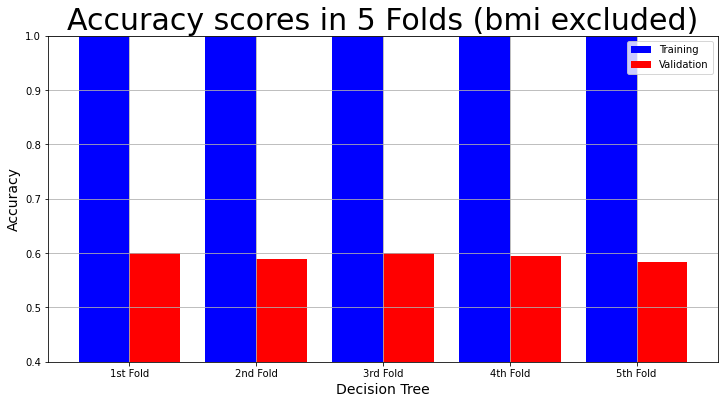

In [30]:
model_name = 'Decision Tree'
plot_result(model_name, "Accuracy", "Accuracy scores in 5 Folds (bmi excluded)", cv_result["Training Accuracy scores"], cv_result["Validation Accuracy scores"])

In [50]:
cv2_result = cross_validation(DT2, x, y, 5)
print(cv2_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.87777778, 0.78888889, 0.82222222, 0.7752809 , 0.62921348]), 'Mean Validation Accuracy': 77.86766541822722, 'Validation Precision scores': array([0.95238095, 0.76363636, 0.82      , 0.83333333, 0.60869565]), 'Mean Validation Precision': 0.7956092603049125, 'Validation Recall scores': array([0.81632653, 0.875     , 0.85416667, 0.72916667, 0.875     ]), 'Mean Validation Recall': 0.8299319727891156, 'Validation F1 scores': array([0.87912088, 0.81553398, 0.83673469, 0.77777778, 0.71794872]), 'Mean Validation F1 Score': 0.80542320986149}


In [32]:
#{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training Accuracy': 100.0, 
# 'Training Precision scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training Precision': 1.0, 
# 'Training Recall scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training Recall': 1.0, 
# 'Training F1 scores': array([1., 1., 1., 1., 1.]), 
# 'Mean Training F1 Score': 1.0, 
# 'Validation Accuracy scores': array([0.87777778, 0.78888889, 0.82222222, 0.7752809 , 0.62921348]), 
# 'Mean Validation Accuracy': 77.86766541822722, 
# 'Validation Precision scores': array([0.95238095, 0.76363636, 0.82      , 0.83333333, 0.60869565]), 
# 'Mean Validation Precision': 0.7956092603049125, 
# 'Validation Recall scores': array([0.81632653, 0.875     , 0.85416667, 0.72916667, 0.875     ]), 
# 'Mean Validation Recall': 0.8299319727891156, 
# 'Validation F1 scores': array([0.87912088, 0.81553398, 0.83673469, 0.77777778, 0.71794872]), 
# 'Mean Validation F1 Score': 0.80542320986149}

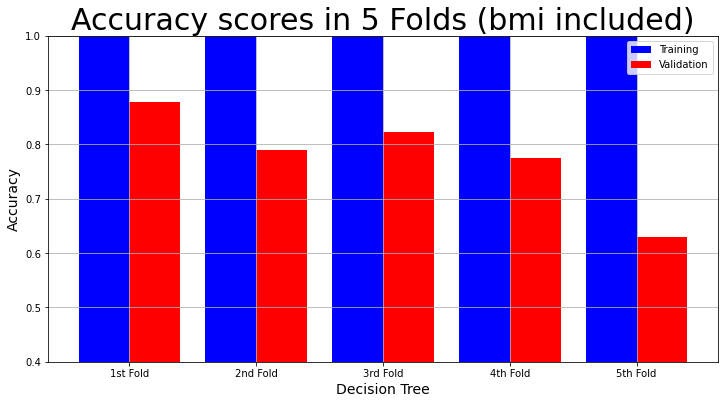

In [51]:
plot_result(model_name, "Accuracy", "Accuracy scores in 5 Folds (bmi included)", cv2_result["Training Accuracy scores"], cv2_result["Validation Accuracy scores"])

In [34]:
import sys
!{sys.executable} -m pip install "numpy<1.24" --user

In [35]:
import dalex as dx

In [52]:
explainer = dx.Explainer(DT, data = nobmix, y=y, label='scikit-learn')

Preparation of a new explainer is initiated

  -> data              : 448 rows 64 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 448 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : scikit-learn
  -> predict function  : <function yhat_proba_default at 0x000001BF1FADC3A0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.458, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 1.0, max = 2.0
  -> model_info        : package sklearn

A new explainer has been created!


In [53]:
explainer.dump(open('explainer_scikitlearn.pickle', 'wb'))

  -> 'residual_function' attribute is a local function; thus, has to be dropped.
